In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, classification_report
import warnings
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv('titanic_train.csv')
test = pd.read_csv('titanic_test.csv')
train.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
test.keys()


Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [4]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 27.8+ KB


In [5]:
Age = test['Age']

In [6]:
test.keys()

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [7]:
test.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [8]:
train.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 66.2+ KB


In [10]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 27.8+ KB


In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 66.2+ KB


In [12]:
train.isnull().sum().sort_values(ascending=False)


Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

In [13]:
test.isnull().sum().sort_values(ascending=False)


Cabin          327
Age             86
Fare             1
PassengerId      0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Embarked         0
dtype: int64

In [14]:
train.isnull().sum().any()


True

In [15]:
test.isnull().sum().any()


True

###### Data Cleaning

In [16]:
train['Age'].fillna(train['Age'].mean(), inplace= True)
train['Embarked'].fillna(train['Embarked'].mode()[0], inplace= True)
test['Age'].fillna(train['Age'].mean(), inplace= True)
test['Fare'].fillna(train['Fare'].mean(), inplace= True)
test.drop('Cabin', axis=1, inplace=True)
train.drop('Cabin', axis=1, inplace=True)

In [17]:
train.isnull().sum().any()


False

In [18]:
test.isnull().sum().any()


False

###### Exploratory Data Analysis

The percentage of 0 class : 62
The percentage of 1 class : 38


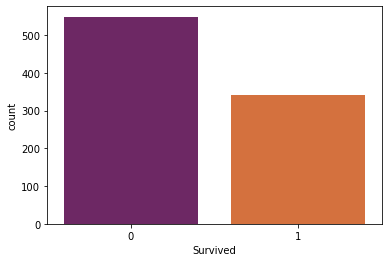

In [19]:
sns.countplot(train['Survived'], palette='inferno');
print('The percentage of 0 class :', round((train['Survived'].value_counts()[0] /len(train))*100))
print('The percentage of 1 class :', round((train['Survived'].value_counts()[1] /len(train))*100))


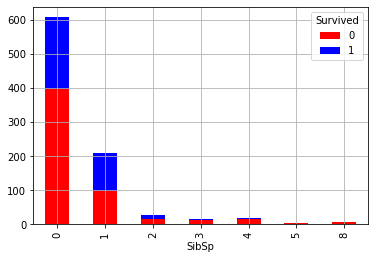

In [20]:
grid = pd.crosstab(train['SibSp'], train['Survived'])
grid.plot(kind='bar', stacked=True, color=['red','blue'], grid=True);


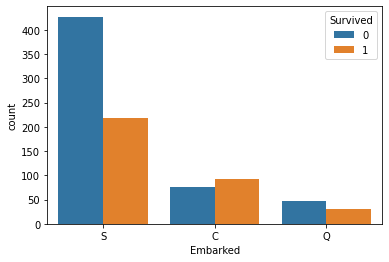

In [21]:
sns.countplot(x='Embarked', hue='Survived',data=train);

In [22]:
train.keys()

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [23]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [24]:
x = train.drop('Survived', axis=1)
x.head()


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [25]:
y = train.iloc[:, 1:2]
y.head()




,Survived
0,0
1,1
2,1
3,1
4,0


In [26]:
X= x.drop(['Name', 'Ticket', 'Embarked','PassengerId'], axis=1)
X.head()



,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,male,22.0,1,0,7.2500
1,1,female,38.0,1,0,71.2833
2,3,female,26.0,0,0,7.9250
3,1,female,35.0,1,0,53.1000
4,3,male,35.0,0,0,8.0500


In [27]:
?pd.get_dummies

In [28]:
X = pd.get_dummies(X)
X.head()



,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male
0,3,22.0,1,0,7.2500,0,1
1,1,38.0,1,0,71.2833,1,0
2,3,26.0,0,0,7.9250,1,0
3,1,35.0,1,0,53.1000,1,0
4,3,35.0,0,0,8.0500,0,1


In [29]:
pd.DataFrame(X)

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male
0,3,22.000000,1,0,7.2500,0,1
1,1,38.000000,1,0,71.2833,1,0
2,3,26.000000,0,0,7.9250,1,0
3,1,35.000000,1,0,53.1000,1,0
4,3,35.000000,0,0,8.0500,0,1
...,...,...,...,...,...,...,...
886,2,27.000000,0,0,13.0000,0,1
887,1,19.000000,0,0,30.0000,1,0
888,3,29.699118,1,2,23.4500,1,0
889,1,26.000000,0,0,30.0000,0,1


In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30,random_state=101)

In [31]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 268 entries, 331 to 829
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Pclass      268 non-null    int64  
 1   Age         268 non-null    float64
 2   SibSp       268 non-null    int64  
 3   Parch       268 non-null    int64  
 4   Fare        268 non-null    float64
 5   Sex_female  268 non-null    uint8  
 6   Sex_male    268 non-null    uint8  
dtypes: float64(2), int64(3), uint8(2)
memory usage: 13.1 KB


In [32]:
from sklearn.preprocessing import StandardScaler
SC = StandardScaler()
#y = SC.fit_transform(y)
#scx = StandardScaler()
X1 = SC.fit_transform(X_train)
#pd.DataFrame(X.hea
X2 = SC.fit_transform(X_test)


In [33]:
pd.DataFrame(X1)

,0,1,2,3,4,5,6
0,-1.594183,0.033757,-0.491310,-0.484325,1.390972,1.358215,-1.358215
1,0.819367,-0.044384,-0.491310,-0.484325,-0.521706,-0.736260,0.736260
2,-0.387408,-1.294631,-0.491310,0.722613,-0.259619,1.358215,-1.358215
3,0.819367,-0.278805,-0.491310,-0.484325,-0.517802,1.358215,-1.358215
4,0.819367,-1.997894,-0.491310,0.722613,-0.395309,1.358215,-1.358215
...,...,...,...,...,...,...,...
618,0.819367,-0.825788,-0.491310,-0.484325,-0.371145,-0.736260,0.736260
619,0.819367,0.190037,-0.491310,-0.484325,0.565583,-0.736260,0.736260
620,-1.594183,0.893301,-0.491310,-0.484325,2.305488,1.358215,-1.358215
621,-1.594183,1.127722,-0.491310,0.722613,0.598670,1.358215,-1.358215


In [34]:
pd.DataFrame(X2)

,0,1,2,3,4,5,6
0,-1.504227,1.153231,-0.435947,-0.449215,-0.104163,-0.741035,0.741035
1,-1.504227,-0.893340,0.579999,-0.449215,3.250593,1.349464,-1.349464
2,-1.504227,-0.818920,0.579999,-0.449215,0.310493,-0.741035,0.741035
3,0.846402,-1.786389,-0.435947,0.888447,-0.374280,-0.741035,0.741035
4,-0.328913,-0.022683,-0.435947,-0.449215,-0.584558,-0.741035,0.741035
...,...,...,...,...,...,...,...
263,0.846402,-0.022683,-0.435947,-0.449215,-0.454275,-0.741035,0.741035
264,-0.328913,0.297392,0.579999,0.888447,-0.036739,1.349464,-1.349464
265,-0.328913,-2.009652,0.579999,0.888447,-0.268509,-0.741035,0.741035
266,0.846402,1.488124,-0.435947,-0.449215,-0.448868,-0.741035,0.741035


In [35]:
from pandas.plotting import scatter_matrix
from sklearn import model_selection
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [36]:
classifier = []
classifier.append(("LogisticReg", LogisticRegression(solver='liblinear',multi_class='ovr')))
classifier.append(("DecisionTree", DecisionTreeClassifier(criterion ='entropy')))
classifier.append(("KNN", KNeighborsClassifier()))
classifier.append(("KernelSVM", SVC(gamma='auto')))
classifier.append(("NaiveBayes", GaussianNB()))
classifier.append(("RandomForest", RandomForestClassifier()))

In [37]:
seed = 0
results = []
names = []
for name, model in classifier:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X_train, y_train,cv=kfold)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LogisticReg: 0.807296 (0.031898)
DecisionTree: 0.749514 (0.049331)
KNN: 0.720584 (0.058454)
KernelSVM: 0.701254 (0.058540)
NaiveBayes: 0.799309 (0.025545)
RandomForest: 0.796006 (0.047215)


In [38]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X1,y_train)


LogisticRegression()

In [39]:
y_pred = logreg.predict(X2)
pd.DataFrame(y_pred)


,0
0,0
1,1
2,0
3,0
4,0
...,...
263,0
264,1
265,0
266,0


In [40]:
cm_log = confusion_matrix(y_test, y_pred)
cm_log

array([[137,  17],
       [ 41,  73]], dtype=int64)

In [41]:
accuracy_score = accuracy_score(y_test, y_pred)
print(accuracy_score*100)


78.35820895522389


In [42]:
report = classification_report(y_test, y_pred)
print(report)


              precision    recall  f1-score   support

           0       0.77      0.89      0.83       154
           1       0.81      0.64      0.72       114

    accuracy                           0.78       268
   macro avg       0.79      0.76      0.77       268
weighted avg       0.79      0.78      0.78       268



###### Application of the Model on the Test Data


In [43]:
test.head()


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


In [44]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         418 non-null    float64
 9   Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 26.2+ KB


In [45]:
x = test.drop(['PassengerId', 'Name', 'Ticket', 'Embarked'], axis=1)
x.head()



,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,male,34.5,0,0,7.8292
1,3,female,47.0,1,0,7.0000
2,2,male,62.0,0,0,9.6875
3,3,male,27.0,0,0,8.6625
4,3,female,22.0,1,1,12.2875


In [46]:
X = pd.get_dummies(x)
X.head()



,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male
0,3,34.5,0,0,7.8292,0,1
1,3,47.0,1,0,7.0000,1,0
2,2,62.0,0,0,9.6875,0,1
3,3,27.0,0,0,8.6625,0,1
4,3,22.0,1,1,12.2875,1,0


In [47]:
test_pred = logreg.predict(X)
pd.DataFrame(test_pred)

,0
0,0
1,0
2,0
3,0
4,0
...,...
413,0
414,1
415,0
416,0


In [48]:
Result = pd.DataFrame()
Result['Name'] = test['Name']
Result['Survived'] = test_pred.reshape(test_pred.shape[0])

In [49]:
Result

,Name,Survived
0,"Kelly, Mr. James",0
1,"Wilkes, Mrs. James (Ellen Needs)",0
2,"Myles, Mr. Thomas Francis",0
3,"Wirz, Mr. Albert",0
4,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0
...,...,...
413,"Spector, Mr. Woolf",0
414,"Oliva y Ocana, Dona. Fermina",1
415,"Saether, Mr. Simon Sivertsen",0
416,"Ware, Mr. Frederick",0
